In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import BernoulliNB

C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
col=["height","lenght","area","eccen","p_black","p_and","mean_tr","blackpix","blackand","wb_trans","classes"]
df=pd.read_csv("page_blocks.csv", sep=';',header=None, names=col,index_col=False)
df[:10]

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,classes
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1
5,5,8,40,1.600,0.550,1.000,2.44,22,40,9,1
6,6,4,24,0.667,0.417,0.708,2.50,10,17,4,1
7,5,6,30,1.200,0.333,0.333,10.00,10,10,1,1
8,5,5,25,1.000,0.400,0.520,10.00,10,13,1,1
9,5,7,35,1.400,0.486,0.914,8.50,17,32,2,1


In [4]:
y=df["classes"].values
X=df.loc[:, df.columns !="classes"].values

In [5]:
forest  = RandomForestClassifier()
param_forest = {
    'bootstrap': [True, False],
    'max_depth': [10,  100, None],
    'max_features':  ['auto', 'sqrt'],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [2,  8],
    'n_estimators': [100, 300]}

extra  = ExtraTreesClassifier()
param_extra = {
    'bootstrap': [True, False],
    'max_depth': [10,    100, None],
    'max_features':  ['auto', 'sqrt'],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [2,  10],
    'n_estimators': [100,  300]}

svc = SVC(kernel="linear",probability=True)
param_svc = {'C':[0.1,10],'gamma':[1,0.001],'kernel':['linear','rbf']}

mult =  MultinomialNB()
param_mult = {'alpha': [1e-4, 1e0,  1e3]}

bern = BernoulliNB()
param_bern = {'alpha': [1e-4,  1e0,  1e3]}

sgd = SGDClassifier(loss='hinge', penalty='l2', tol=None)
param_sgd = {
    'alpha': [1e-4,  1e0, 1e3], # learning rate
    'n_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'l1_ratio': [0,  0.5, 1]}

knn  = KNeighborsClassifier()
param_knn = {"n_neighbors": np.arange(1, 31, 2),
        "metric": ["euclidean", "cityblock"],
         'weights': ['uniform', 'distance']}

gr  = GradientBoostingClassifier(random_state=1)
param_gr = {'n_estimators': [10,  100, 1000],
                    'max_depth': [2, 5],
                    'min_samples_leaf': [1,  3]}

lr  = LogisticRegression(solver='newton-cg', multi_class='multinomial')
param_lr = {'class_weight': [None, 'balanced'],'multi_class':['ovr', 'multinomial'],
            'penalty': ['l2'], 'C': [0.1,1],'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga']}

mlp  =  MLPClassifier(alpha=1)
param_mlp = { 'tol': [1e-2,  1e-6],
          'epsilon': [1e-3,  1e-8],
          'learning_rate': ["constant", "invscaling", "adaptive"],
          'hidden_layer_sizes': [(100,1), (100,2), (100,3)],
          'alpha': [10.0 ** -np.arange(1, 2)]  }

gs  =  BaggingClassifier(base_estimator=lr)

In [6]:
allClassifier=[]
allClassifier.append([lr,param_lr])
allClassifier.append([forest,param_forest])
allClassifier.append([extra,param_extra])
allClassifier.append([mult,param_mult])
allClassifier.append([bern,param_bern])
allClassifier.append([sgd,param_sgd])
allClassifier.append([mlp,param_mlp])
allClassifier.append([knn,param_knn])
allClassifier.append([gr,param_gr])
allClassifier.append([svc,param_svc])
allClassifier.append([gs,{}])




In [7]:
params={}
scores=[]
#best=[]
for m in allClassifier:
    model=m[0]
    params=m[1]

    gs = GridSearchCV(model, param_grid=params,cv=3,verbose=1)
    gs = gs.fit(X, y)
    names=""
    print(gs.best_estimator_)
    #best.append(gs.best_estimator_)
    print(names+": "+str(gs.best_score_))  
    scores.append(str(gs.best_score_))
    print(gs.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\App

C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.lega

C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valenti

C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valenti

C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valenti

C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\valenti

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)
: 0.9495706194043486
{'C': 1, 'class_weight': None, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=100, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
: 0.9634569705828613
{'bootstrap': False, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:  2.1min finished


ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=100, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
: 0.9608989585236616
{'bootstrap': True, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)
: 0.9115658688105244
{'alpha': 0.0001}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
BernoulliNB(alpha=0.0001, binarize=0.0, class_prior=None, fit_prior=True)
: 0.8976795176320117
{'alpha': 0.0001}
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0, learning_rate='optimal',
       loss='log', max_iter=None, n_iter=1000, n_jobs=1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
: 0.9400694317558925
{'alpha': 0.0001, 'l1_ratio': 0, 'loss': 'log', 'n_iter': 1000, 'penalty': 'l2'}
Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: Convergen

C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: Convergen

MLPClassifier(activation='relu', alpha=array([0.1]), batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 3), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-06, validation_fraction=0.1,
       verbose=False, warm_start=False)
: 0.9095560021925818
{'alpha': array([0.1]), 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 3), 'learning_rate': 'adaptive', 'tol': 1e-06}
Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    4.8s finished


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cityblock',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')
: 0.9486570436689201
{'metric': 'cityblock', 'n_neighbors': 9, 'weights': 'distance'}
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.4min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)
: 0.9607162433765759
{'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 1000}
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 182.2min finished


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
: 0.9568792252877764
{'C': 10, 'gamma': 1, 'kernel': 'linear'}
Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\C

C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\valentin.legall\AppData\Local\C

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
: 0.9515804860222913
{}


C:\Users\valentin.legall\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [12]:
#score=[0.9376941348437785,0.9608989585236616,0.9537730677873195,
#       0.9060844143979536,0.8976795176320117,0.9355015530787503,0.9128448748401242,0.9442718801388635,0.9607162433765759,0.9521286314635483]
name=['LogisticRegression','RandomForestClassifier','ExtraTreesClassifier',
      'MultinomialNB','BernoulliNB','SGDClassifier','MLPClassifier','KNeighborsClassifier','GradientBoostingClassifier','SVC','BaggingClassifier']

In [15]:
df

,name,val
1,RandomForestClassifier,0.9634569705828613
2,ExtraTreesClassifier,0.9608989585236616
8,GradientBoostingClassifier,0.9607162433765759
9,SVC,0.9568792252877764
10,BaggingClassifier,0.9515804860222913
0,LogisticRegression,0.9495706194043486
7,KNeighborsClassifier,0.9486570436689201
5,SGDClassifier,0.9400694317558925
3,MultinomialNB,0.9115658688105244
6,MLPClassifier,0.9095560021925818


[Text(0,0,'RandomForestClassifier'),
 Text(0,0,'ExtraTreesClassifier'),
 Text(0,0,'GradientBoostingClassifier'),
 Text(0,0,'SVC'),
 Text(0,0,'BaggingClassifier'),
 Text(0,0,'LogisticRegression'),
 Text(0,0,'KNeighborsClassifier'),
 Text(0,0,'SGDClassifier'),
 Text(0,0,'MultinomialNB'),
 Text(0,0,'MLPClassifier'),
 Text(0,0,'BernoulliNB')]

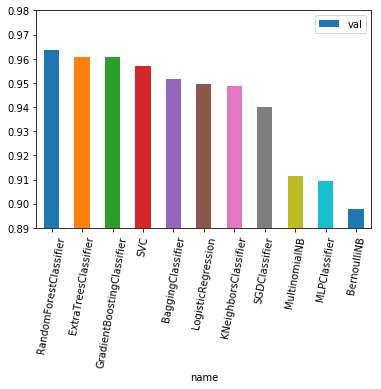

In [18]:
df = pd.DataFrame({'name':name, 'val':scores})
df=df.sort_values('val', ascending=False)
df['val']=df['val'].astype(float)
ax = df.plot.bar(x='name', y='val', rot=0)
ax.set_ylim(ymin=0.89,ymax=0.98)
ax.set_xticklabels(df.name, rotation=80)


In [21]:
forest  = RandomForestClassifier()
param_forest = {
    'bootstrap': [True, False],
    'max_depth': [5,8,10,15,20,50,  100, None],
    'min_samples_leaf': [1, 3,5, 8,10],
    'min_samples_split': [2,3,4,5],
    'n_estimators': [100]
}

In [50]:
gs = GridSearchCV(forest, param_grid=param_forest,cv=3,verbose=2,n_jobs=3)
gs = gs.fit(X, y)
print(gs.best_estimator_)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    7.6s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   35.8s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:  2.9min
[Parallel(n_jobs=3)]: Done 960 out of 960 | elapsed:  5.2min finished


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [29]:
def grid_scores_to_df(grid_scores):
    rows = list()
    for grid_score in grid_scores:
        for fold, score in enumerate(grid_score.cv_validation_scores):
            row = grid_score.parameters.copy()
            row['fold'] = fold
            row['score'] = score
            rows.append(row)
    df = pd.DataFrame(rows)
    return df
dfscore=grid_scores_to_df(gs.grid_scores_)

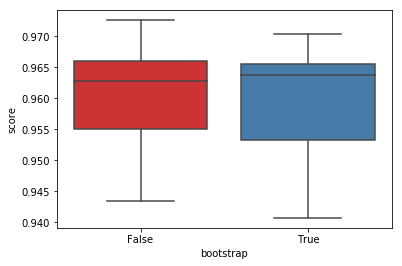

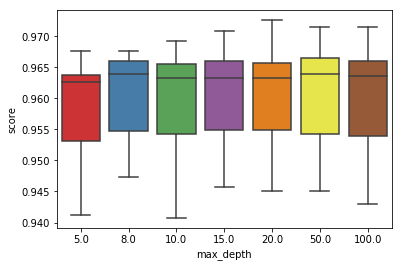

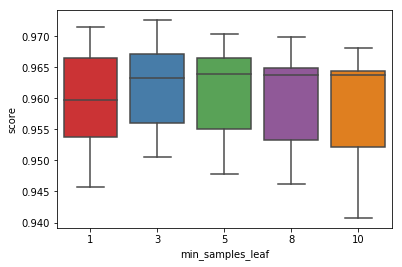

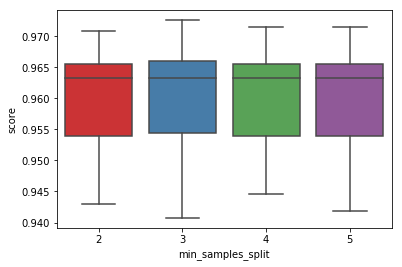

In [30]:
cols=['bootstrap', 'max_depth' ,'min_samples_leaf','min_samples_split' ]

for c in cols:
    sns.boxplot(y="score", x=c, data=dfscore, palette="Set1")
    plt.show()

In [51]:
gs2 = GridSearchCV(gs.best_estimator_, param_grid={'n_estimators': [25,50,75,100,125,150,175,200]},cv=3,verbose=2,n_jobs=3)
gs2 = gs2.fit(X, y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:   12.4s finished


In [55]:
est=[]
means=[]
for r in gs2.grid_scores_:
    est.append(r[0]['n_estimators'])
    means.append(r[1])

df2 = pd.DataFrame({'param':est, 'score':means})
df2 = df2.sort_values(['param', 'score'], ascending=[1, 0])# Get the regular numpy array from the MaskedArray
df2

,param,score
0,25,0.962909
1,50,0.965101
2,75,0.962361
3,100,0.960716
4,125,0.962178
5,150,0.963457
6,175,0.962178
7,200,0.961082


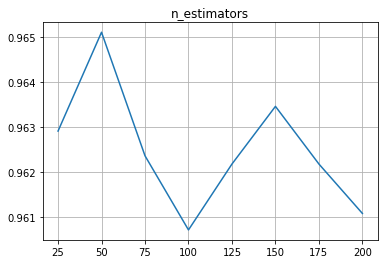

In [58]:
important_param='n_estimators'
#X_axis = np.array(df2['param'], dtype=float)

plt.figure(1)
plt.plot(df2['param'],df2['score'] )
plt.yscale('linear')
plt.title('n_estimators')
plt.grid(True)
plt.show()

In [59]:
rfc=gs2.best_estimator_
rfc

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=44)


In [61]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [62]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, y_pred))


Accuracy 0.975650249031544


In [ ]:
#ROC is not working for muticlass problem